### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

## EDA

In [3]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
459,41,No,Non-Travel,509,Research & Development,2,4,Other,1,616,...,1,80,0,10,3,3,8,7,0,7
813,39,Yes,Travel_Frequently,203,Research & Development,2,3,Life Sciences,1,1127,...,4,80,3,21,4,3,18,7,11,5
926,43,No,Travel_Rarely,531,Sales,4,4,Marketing,1,1293,...,4,80,0,23,3,4,21,7,15,17


In [4]:
df.shape

(1470, 35)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### dropp col

In [8]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

In [9]:
df.shape

(1470, 31)

## Seperate num col

In [10]:
num = df.select_dtypes(exclude='O')
num.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [11]:
num.shape

(1470, 23)

## Seperate categorical col

In [12]:
cat = df.select_dtypes(include='O')
cat.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [13]:
cat.shape

(1470, 8)

## Visualization for num col

<AxesSubplot: >

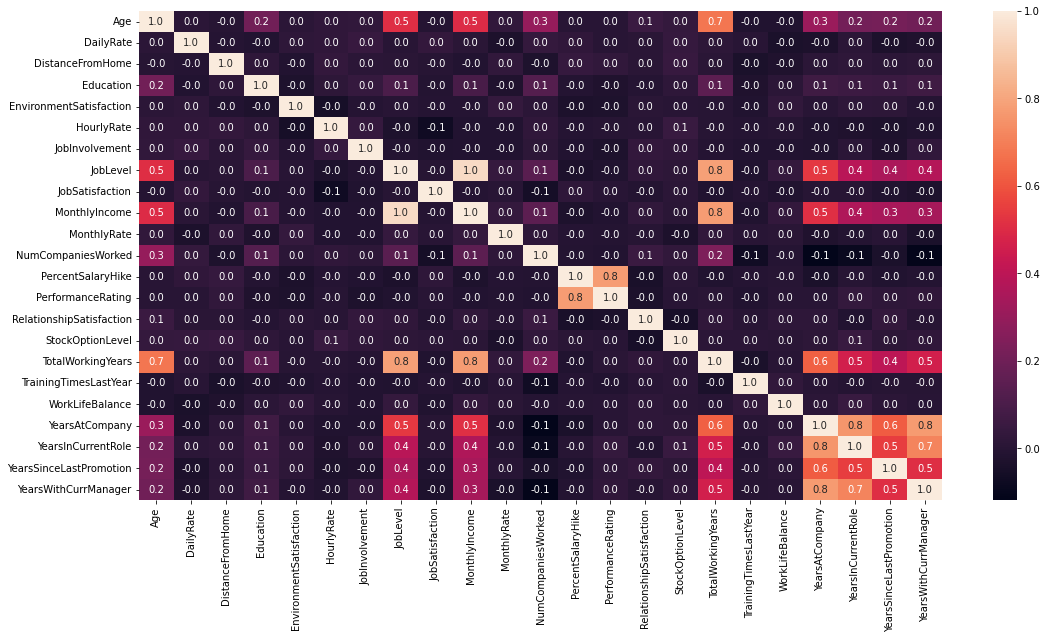

In [14]:
plt.figure(figsize=(18,9))
sns.heatmap(num.corr(), annot=True, fmt='.1f')

## Correlation

### strong correlation between columns

<AxesSubplot: >

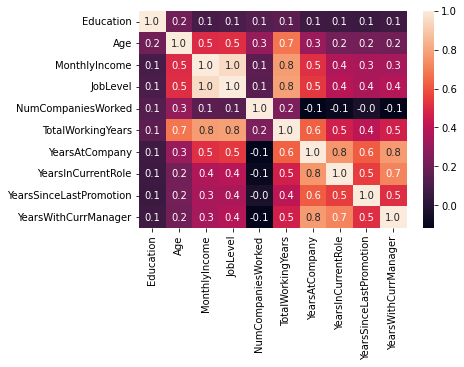

In [15]:
cols = ['Education','Age','MonthlyIncome','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
sns.heatmap(df[cols].corr(), annot=True, fmt='.1f')

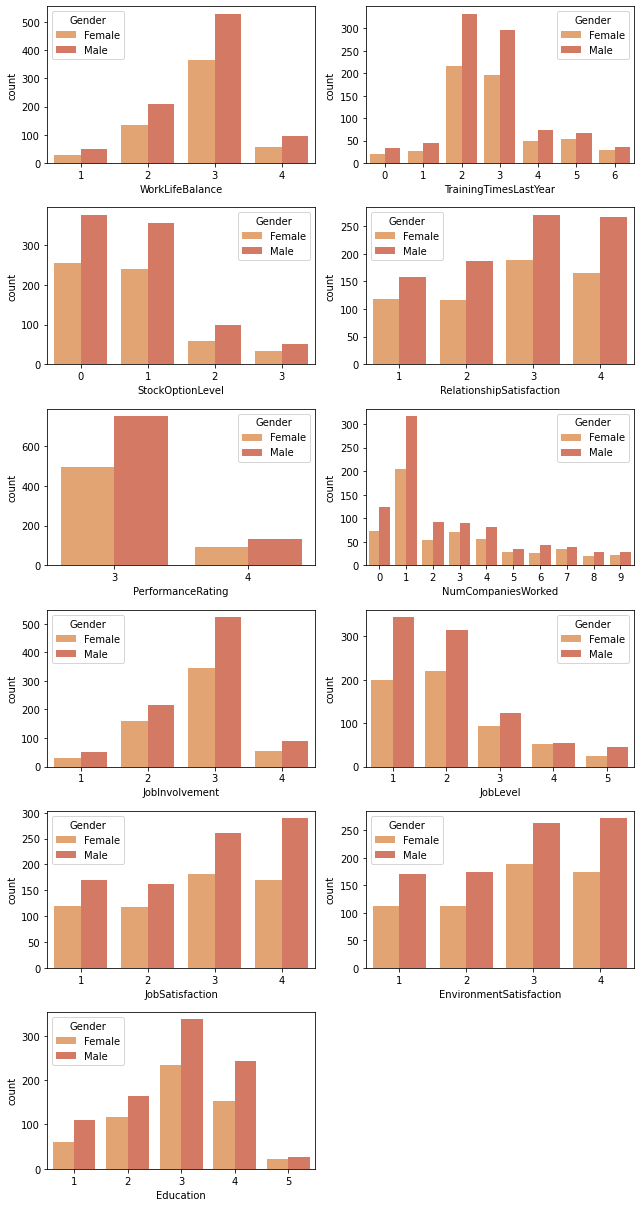

In [16]:
cols = ['WorkLifeBalance','TrainingTimesLastYear','StockOptionLevel',
    'RelationshipSatisfaction','PerformanceRating','NumCompaniesWorked',
   'JobInvolvement', 'JobLevel', 'JobSatisfaction',
   'EnvironmentSatisfaction','Education']

plt.figure(figsize=(9,36))
for i,col in enumerate(cols):
    axes = plt.subplot(13,2, i + 1)
    sns.countplot(x=df[col], hue=df['Gender'], palette=['#F4A261','#E76F51'])
plt.tight_layout()
plt.show()

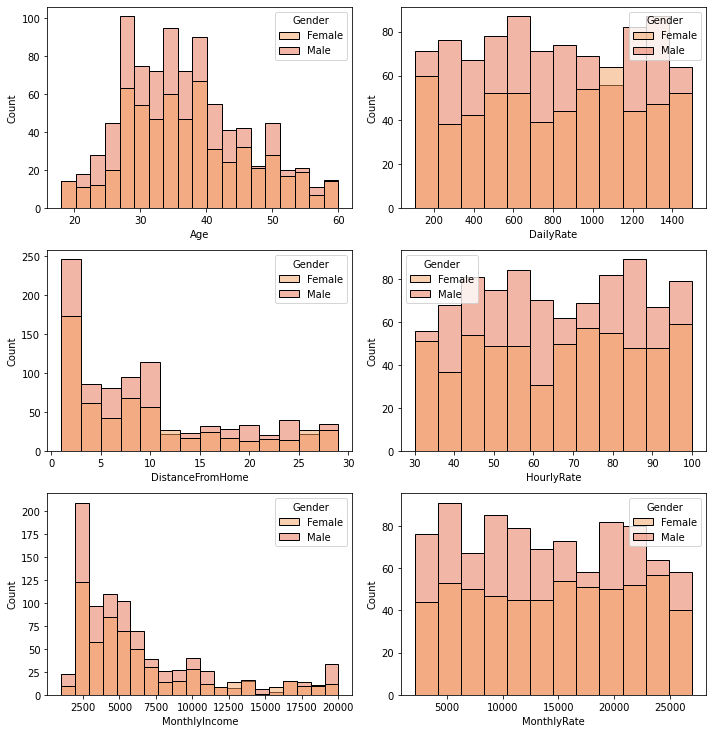

In [17]:
hist = ['Age', 'DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
       'MonthlyRate']

plt.figure(figsize=(10,20))
for i,col in enumerate(hist):
    axes = plt.subplot(6,2, i + 1)
    warnings.simplefilter(action='ignore')
    sns.histplot(x=df[col], hue=df['Gender'], palette=['#F4A261','#E76F51'])

plt.tight_layout()
plt.show()

### Correlation between years

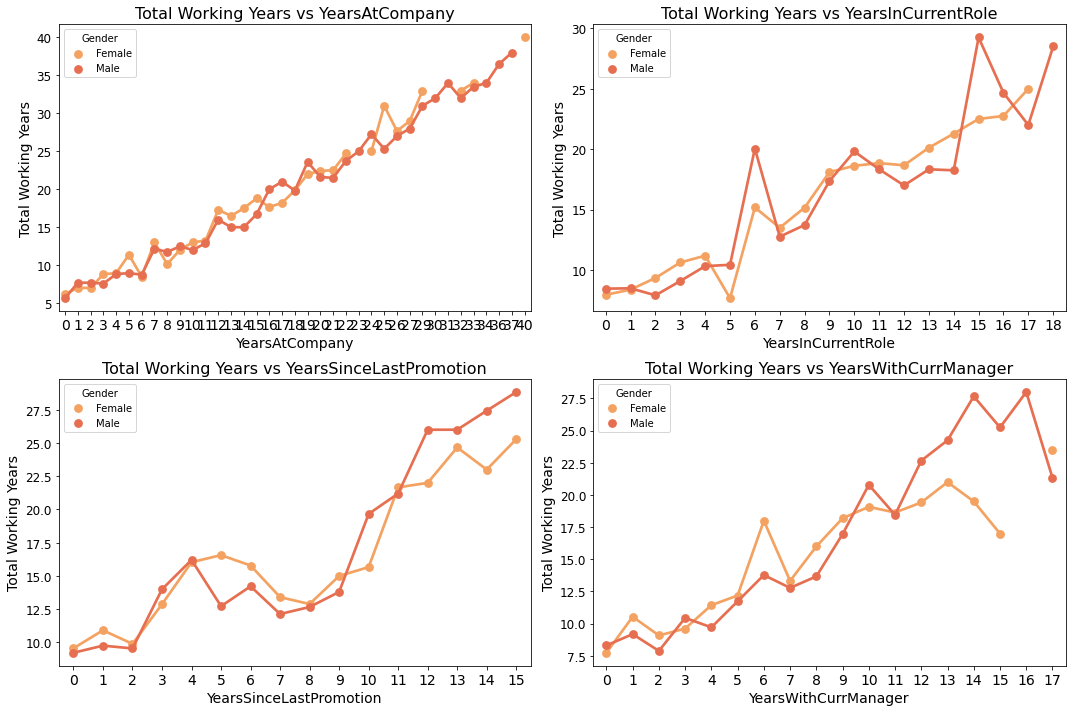

In [18]:
colunas = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(15, 10))

for i, col in enumerate(colunas):
    plt.subplot(2, 2, i + 1)
    sns.pointplot(x=df[col], y=df['TotalWorkingYears'], hue=df['Gender'], palette=['#F4A261', '#E76F51'], errorbar=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.title(f'Total Working Years vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Total Working Years', fontsize=14)
    plt.legend(title='Gender')

plt.tight_layout()
plt.show()

### Correlation b\w Years at the Company

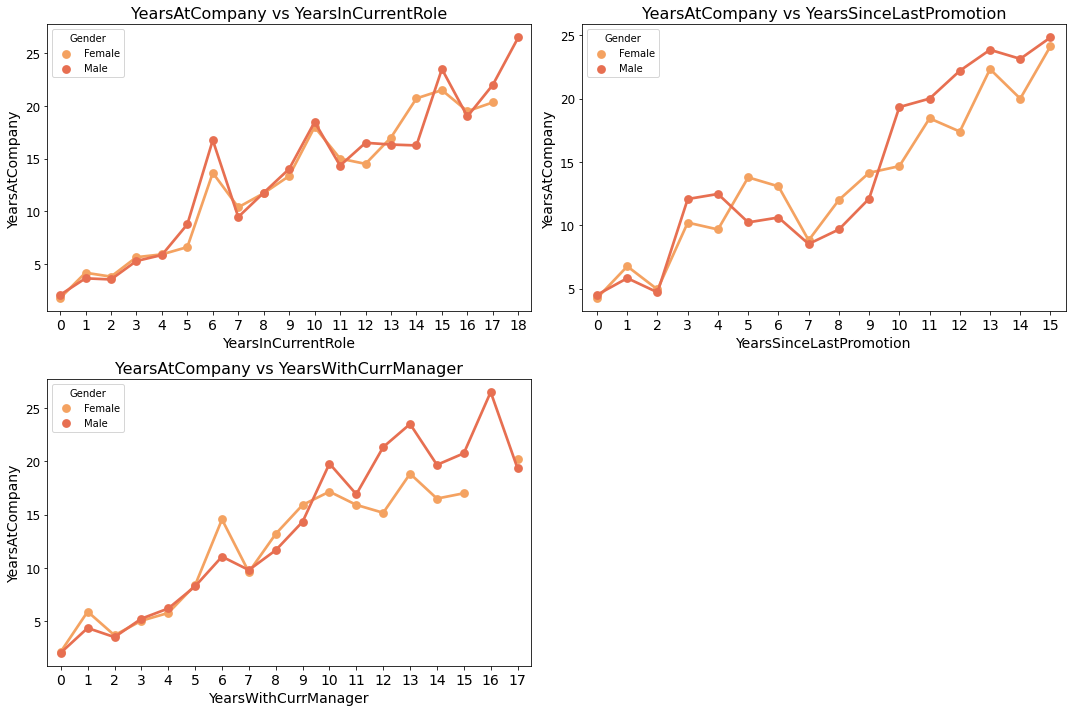

In [19]:
cols = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)
    sns.pointplot(x=df[col], y=df['YearsAtCompany'], hue=df['Gender'], palette=['#F4A261', '#E76F51'], errorbar=None)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('YearsAtCompany', fontsize=14)
    plt.title(f'YearsAtCompany vs {col}', fontsize=16)
    plt.legend(title='Gender')

plt.tight_layout()
plt.show()

## Visualization for Categorical cols

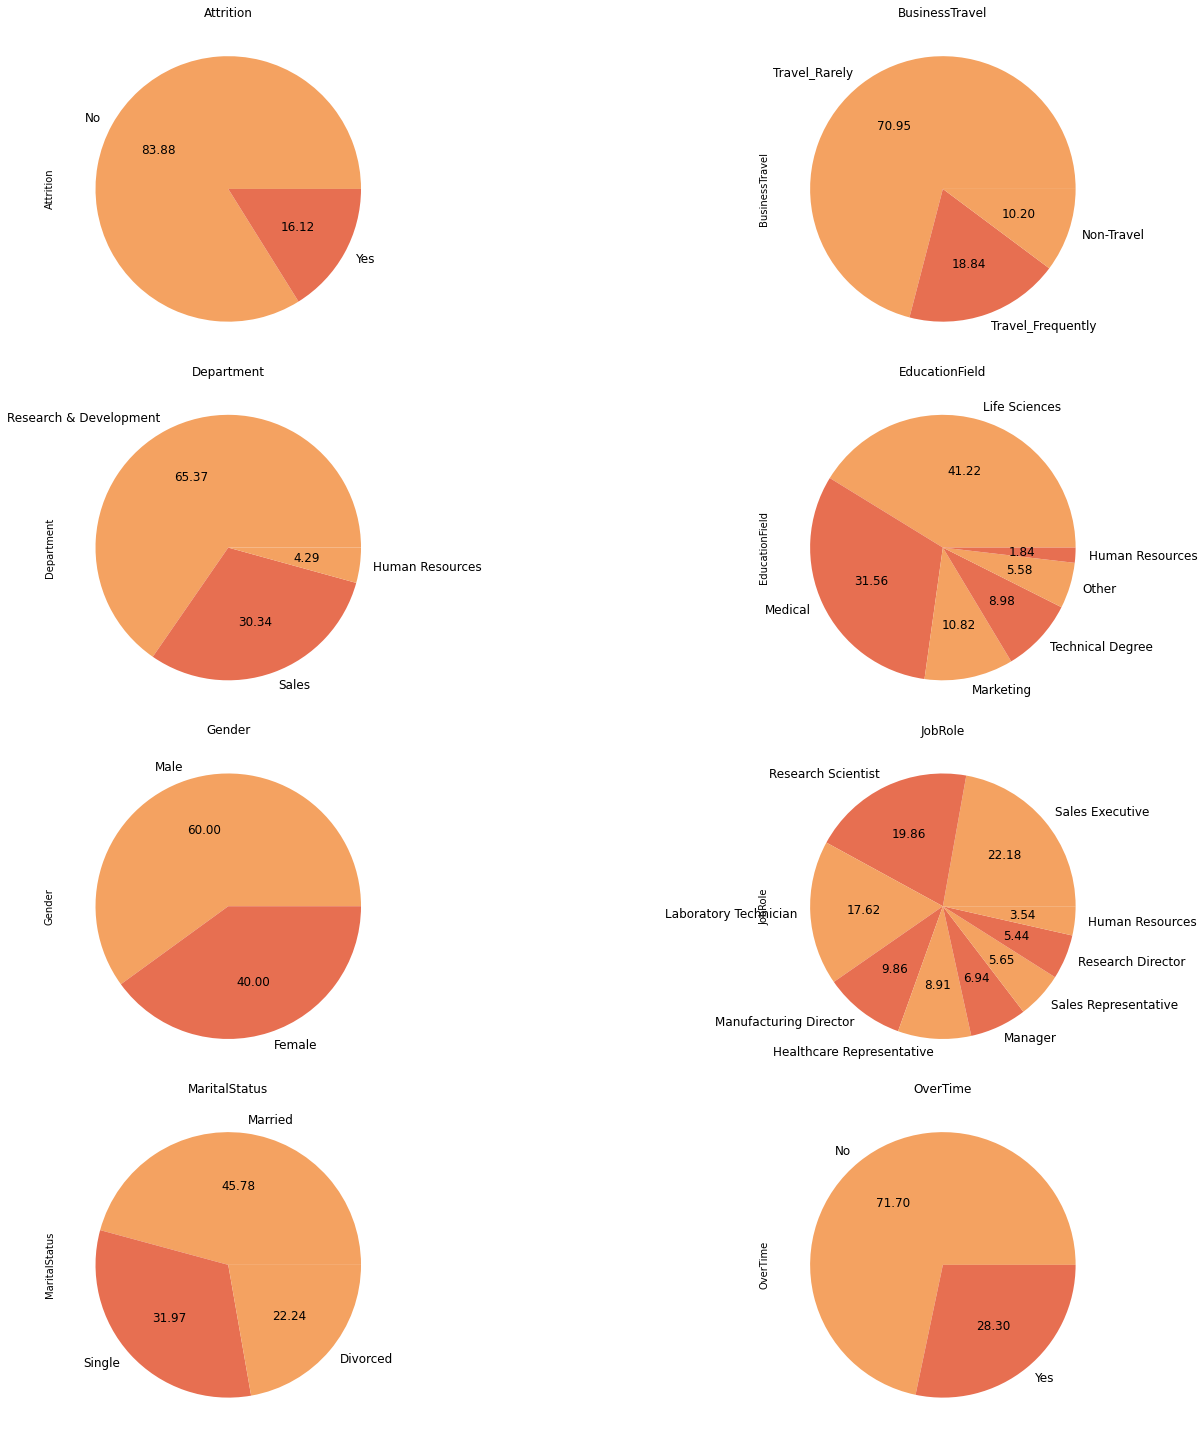

In [20]:
plt.figure(figsize=(20,40))
for i,col in enumerate(cat):
    axes = plt.subplot(8,2, i + 1)
    df[col].value_counts().plot.pie(autopct='%.2f', colors=['#F4A261','#E76F51'],textprops={'size':12,'color':'black'})
    plt.title(col)
plt.tight_layout()
plt.show()

## Linear regression 

In [21]:
X = num.iloc[:, 0:22].values
y = num.iloc[:, 22].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [23]:
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [24]:
rl.predict

<bound method LinearModel.predict of LinearRegression()>

In [25]:
cv_linear = cross_val_score(estimator = rl, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = rl.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = rl.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)


CV:  0.6115775002245873
R2_score (train):  0.6516720130840654
R2_score (test):  0.6015391912442671
RMSE:  2.31213432610882
